<div id="header">
<h1 class="title">CS2900 :- Topic 3 Lab</h1>
<h2 class="author">Hugh Shanahan and Tom Kuipers</h2>
</div>

The learning outcomes of this session are:

-   To have an introductory understanding of solving linear equations in
    NumPy and be introduced to ill-conditioned matrices. To have
    experience of using the NumPy reference document pages.

-   To become familiar with projecting onto sub-spaces and null spaces.

-   Introduce the concept of power series solutions.

Set up
======

1. Initialise the the test suite so that you can check and grade your solutions.

2. Be sure to import NumPy just as you did in the previous lab sheets.

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('config/lab3.ok')

In [ ]:
import numpy as np
import math

# Rectangular matrices

As noted in the lectures we can define rectangular matrices:

In [ ]:
A = np.array([[1,2,3],[3,2,1]])
B = np.array([[1,1,1,2],[-1,-1,0,3],[0,1,0,1]])
print(A)
print(B)

## CHECKPOINT 1

**Multiply these matrices:**
- **Define the variable `AB` equal to the multplication $AB$**
- **Do the same as above for $BA$.**

**Try and predict what will happen before you do this.** 

In [ ]:
# Your code here...


In [ ]:
ok.grade('cp1')


Solving linear equations
========================

As discussed in Topic 3 we can solve equations of the form:
$$\mathbf{A} \underline{x} \;\; = \;\; \underline{b} \;\; ,
(1)$$ where we know $\mathbf{A}$ and $\underline{b}$
but not $\underline{x}$. 

In NumPy this can be computed using the function `numpy.linalg.solve`.

Solving
-------
Go to the NumPy reference pages
    <a href="https://docs.scipy.org/doc/numpy/reference/" class="uri">https://docs.scipy.org/doc/numpy/reference/</a>
    and find the page on `numpy.linalg.solve` and determine how to use it
    to solve the above equation.

In [ ]:
# You can use this code cell to play around with solving...



## CHECKPOINT 2

- **Create two lists `As` and `bs` which are composed of four NumPy matrices and four NumPy vectors respectively. They should have the following values (ensure that all the values are of type `float`).**

$$\begin{aligned}
\mathbf{As}[0] = 
\begin{pmatrix}
10 & 1 \\
1 & 10 
\end{pmatrix}
&& \underline{bs}[0] = 
\begin{pmatrix}
200 \\
-200
\end{pmatrix} \\
\mathbf{As}[1] = 
\begin{pmatrix}
10 & 1 & 2\\
1 & 10 & -3 \\
3 & 15 & -3 
\end{pmatrix}
&& \underline{bs}[1] = 
\begin{pmatrix}
200 \\
-200 \\
-150
\end{pmatrix} \\
\mathbf{As}[2] = 
\begin{pmatrix}
10 & 1 & 2\\
1 & 10 & -3 
\end{pmatrix}
&& \underline{bs}[2] = 
\begin{pmatrix}
200 \\
-200 \\
-150
\end{pmatrix} \\
\mathbf{As}[3] = 
\begin{pmatrix}
1 & 1 \\
2 & 2
\end{pmatrix}
&& \underline{bs}[3] = 
\begin{pmatrix}
200 \\
-200
\end{pmatrix} \end{aligned}$$
    
- **Use `numpy.linalg.solve` to solve equations of the form (1) (described above) to create a list `xs` where each entry is a solution to the corresponding value in `As` and `bs`.**

**NOTE:** Some of these instances will create an error. Ask yourself why did this happen?

In [ ]:
# Your code here...


In [ ]:
ok.grade('cp2')

## CHECKPOINT 3

- **Write a function `checkNull` that accepts a single argument `p` which is a NumPy vector.**
    - **`checkNull` returns a boolean that is `True` is the length of the vector is less than $10^{-6}$ and `False` otherwise.**


- **Create new lists `Cs`, `ds` and `solutions` which are the matrices and vectors inside `As`, `bs` and `xs` where there is a solution (i.e. the code does not throw an error).**

In [ ]:
# Your code here...



In [ ]:
ok.grade('cp3')

## CHECKPOINT 4

**One can check if the above approach is correct by checking if**

$$
\begin{equation}
\mathbf{C}[i] \underline{d}[i] - \underline{y}[i] \;\; = \;\; \underline{0} \;\;\; (2)
\end{equation}
$$

(where $i$ is the $i$th entry of each of the lists - so if all of the above cases of `A` and `b` have solutions, then $i=0 \dots 3$.)

- **Write another function `testSolutions` which accepts as arguments `C`, `d` and `y`.**
    - **`testSolutions` returns a tuple of _boolean_ values that are return values of `checkNull`, where the vector passed to it is the left hand side of (2) for each entry of $i$.**

In [ ]:
# Your code here...



In [ ]:
ok.grade('cp4')

# Nearly singular matrices

We’ve note previously that many matrices are singular -
i.e. non-invertible. There are also many matrices which are nearly
singular. The upshot of this is that solutions to equation **(1)**
are very unstable. This can even turn up in simple $2 \times 2$
matrices.

## CHECKPOINT 5

**Consider the following very similar matrices:**

$$\mathbf{E1} = 
    \begin{pmatrix}
    400.0 & -201.0\\
    -800.0&401.0 
    \end{pmatrix}
    \;\; 
    \mathbf{E2} = 
    \begin{pmatrix}
    401.0 & -201.0\\
    -800.0&401.0 
    \end{pmatrix}$$

**For**

$$\underline{z} \;\; = \;\; 
    \begin{pmatrix}
    200.0 \\
    -200.0
    \end{pmatrix}$$ 
    
**Compute the solutions $x1$, $x2$ for** 
$$\begin{aligned}
    \mathbf{E1} \underline{x1} \;\; &=& \underline{z} \;\; ,\\
    \mathbf{E1} \underline{x2} \;\; &=& \underline{z} \;\; .\end{aligned}$$
    
**Compare these solutions. How similar are they? Why do you think that has happened?**

In [ ]:
# Your code here...

print(. . .)
print(. . .)

In [ ]:
# No tester for this question, just for you to think about.

# Projection

As discussed in Topic 3, we can project a vector in a particular space
onto a sub-space (e.g. project a vector in 2 dimensions onto a line,
project a vector in 3 dimensions onto a plane and so on).

To do this we need a orthonormal basis for the sub-space.

We then construct a matrix $\mathbf{P}$ whose rows are made up of the
unit vectors of the orthonormal basis. 

If the vector we want to project
is $\underline{x}$ then
$\mathbf{M} = \mathbf (\mathbf{P}^{\intercal} \mathbf{P}) \underline{x}$ is the projected
vector.

$\mathbf{M}$ is matrix we can use to project *any* vector in the space onto the sub-space.

# 2 Dimensions

We’ll first consider a 2 dimensional example with the following line.

<figure>
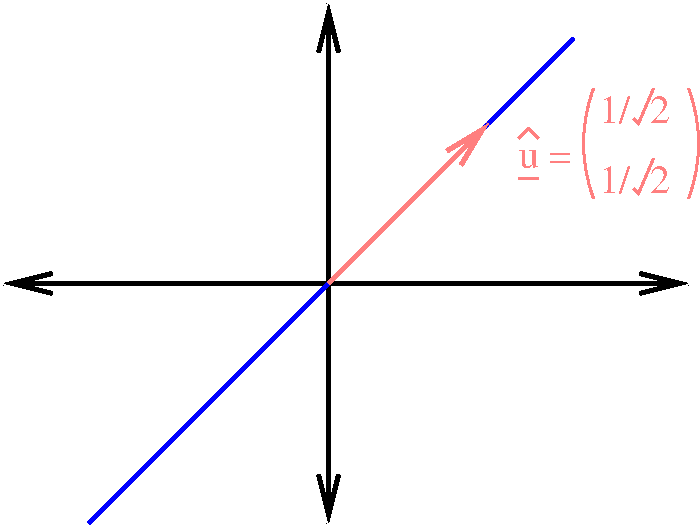
</figure>

We define

In [ ]:
u_hat = np.array([1.0/math.sqrt(2),1.0/math.sqrt(2)])

In [ ]:
P = np.array([u_hat])

    (It's important make sure you have the square bracket ordering correct.)

In [ ]:
Pt = np.transpose(P)

In [ ]:
M = Pt.dot(P)

In [ ]:
print(M)

## CHECKPOINT 6

**One can now use $\mathbf{M}$ to project a vector onto this line.**

- **Define the list `X_cp6` ($X$) where**

$$\begin{aligned}
X[0] = \begin{pmatrix}
1\\ 0 
\end{pmatrix} \\
X[1] = 
\begin{pmatrix}
1\\ 1 
\end{pmatrix} \\
X[2] = 
\begin{pmatrix}
0 \\ -1 
\end{pmatrix}\\
X[3] = 
\begin{pmatrix}
1\\ -1 
\end{pmatrix}
\end{aligned}
$$ 

- **Create a list `Y_cp6` where $Y[i] = M X[i]$.**
    
**What did you find? Did they match with what you expected?**

In [ ]:
# Your code here...



In [ ]:
ok.grade('cp6')

We could have picked a different unit vector to represent the same line, namely;

$\underline{\hat{u}} = \begin{pmatrix}-1/\sqrt 2 \\ -1 / \sqrt 2\end{pmatrix}$.
    
## CHECKPOINT 7
    
- **Compute `Mnew` using the same procedure described at the start of this section with $\underline{\hat{u}}$.**

**Compare  this with `M`. Are they different?**

In [ ]:
# Your code here...



In [ ]:
ok.grade('cp7')

# 3 Dimensions

This can be extended to three dimensions. In this case, we will consider
the projection from 3 dimensions to the x-y plane and we shall pick as
an orthonormal basis 

$$\underline{\hat{u}} =
\begin{pmatrix}
1 \\
0 \\
0 
\end{pmatrix} \;\; 
\underline{\hat{v}} =
\begin{pmatrix}
0 \\
1 \\
0 
\end{pmatrix}$$

## CHECKPOINT 8

- **Define the variable `P_3` which is equal to the corresponding matrix $\mathbf{P_3}$ using** $\underline{\hat{u}}$ and $\underline{\hat{v}}$ 

- **Hence, compute the variable `M_3` $ = \mathbf{P_3}^{\intercal}\mathbf{P_3}$.**

In [ ]:
# Your code here...



In [ ]:
ok.grade('cp8')

## CHECKPOINT 9

- **Compute the list `X_3` where**

$$
\begin{aligned}
X3[0] = 
\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}, \\ 
X3[1] = \begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}, \\ 
X3[2] = 
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix} \\
\end{aligned}
$$ 

- **Compute the list `Y_3` where $Y3[i] = \mathbf{M_3} \underline{X3[i]}$.**

**Do the results match what you expected?**

In [ ]:
# Your code here...



In [ ]:
ok.grade('cp9')

## CHECKPOINT 10

**We can repeat above for different basis vectors to represent the same sub-space, namely**

$$\underline{\hat{u}} =
    \begin{pmatrix}
    1/\sqrt 2 \\
    1 / \sqrt 2\\
    0 
    \end{pmatrix} \;\; 
    \underline{\hat{v}} =
    \begin{pmatrix}
    1 / \sqrt 2 \\
    -1 / \sqrt 2\\
    0 
    \end{pmatrix}$$
    
**Compute the projection matrix `M_3alt` which is the projection matrix using these basis vectors and compare it with `M_3`.**

In [ ]:
# Your code here...



In [ ]:
ok.grade('cp10')

# Grading your Checkpoints

Use the code cell below to grade your checkpoints and run all the tests. For this lab, there are **13** graded checkpoints. You should aim for at least **75%** on each lab sheet.

Extension checkpoints are not graded but you are encouraged to do them if you have time and have finished the lab sheet! You will be expected to know how to write code using Numpy in the exam, so they are good practice.

In [ ]:
ok.score()